<a href="https://colab.research.google.com/github/dwihdyn/algo-trading/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference : https://www.oreilly.com/library/view/hands-on-algorithmic-trading/9781492082637/** 

Module 2 : Strategy Analysis

Summary :
1.   Get Stock price from alphavantage API
2.   Rename data column
3.   Convert prices from string to float
4.   Convert the index to date
5.   Visualise data in time series
6.   Create & calculate SMA10 & SMA20
7.   Sort the data with the date, ascending order
8.   Recalculate SMA10 & SMA20 due to sort data
9.   Remove any NaN values in SMA10 & SMA20
10.  Strategy evaluation using Information & Spearman correlation


***IMPORT MODULES***

In [0]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

***IMPORT MSFT DATA FROM ALPHAVANTAGE***

In [79]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=RKKWDNO3XD91IUBZ")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [80]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-01-07 to 2019-08-15
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


***RENAME THE (BAD) NAMING COLUMN ['1. open', ...] -> ['open', ...]***


In [81]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [82]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

***CONVERT PRICES FROM STRING TO FLOAT***

In [83]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

***CONVERT THE INDEX TO DATE***

In [84]:
# type(stock.index) # check that its index
stock.index = pd.to_datetime(stock.index)
type(stock.index) # now check that now is date

pandas.core.indexes.datetimes.DatetimeIndex


***SHOW 10 SAMPLE DATA BY RANDOM***


In [85]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2019-10-31,144.900,144.93,142.9900,143.37,24605135.0
2019-11-29,152.100,152.30,151.2800,151.38,11977300.0
2019-10-07,137.140,138.18,137.0200,137.12,16601284.0
2019-12-05,150.050,150.32,149.4800,149.93,17880601.0
2019-11-14,147.020,148.41,147.0000,148.06,19755100.0
2019-08-19,137.855,138.55,136.8850,138.41,24370543.0
2019-09-18,137.360,138.67,136.5299,138.52,24473386.0
2019-10-14,139.690,140.29,139.5200,139.55,13591639.0
2019-12-23,158.120,158.12,157.2700,157.41,17726283.0
2019-10-30,143.520,145.00,142.7900,144.61,18496591.0


***SUMMARISE DATA***

In [86]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,144.429329,145.225537,143.337444,144.382850,2.245657e+07
std,7.487524,7.519707,7.757246,7.719563,6.536061e+06
min,134.390000,134.580000,132.250000,133.390000,8.989150e+06
25%,138.001250,138.707500,136.626250,137.705000,1.795236e+07
50%,140.980000,142.080000,139.941800,141.322500,2.122114e+07
75%,150.907500,151.470000,149.988750,150.575000,2.525499e+07
max,159.450000,160.730000,158.330000,160.620000,5.359961e+07


***VISUALISE DATA***

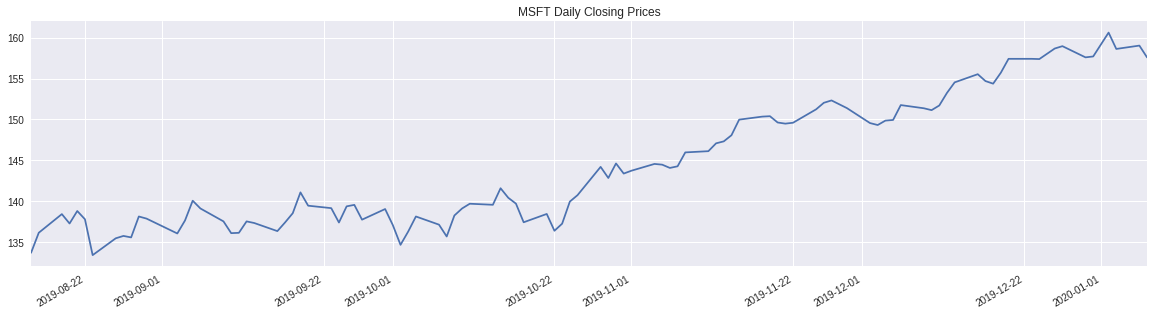

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c1d837c50>, None)

In [87]:
stock['close'].plot(figsize=(20,5), title='MSFT Daily Closing Prices'),plt.show()

***EXPLORING SIGNALS : SMA CROSSOVER***

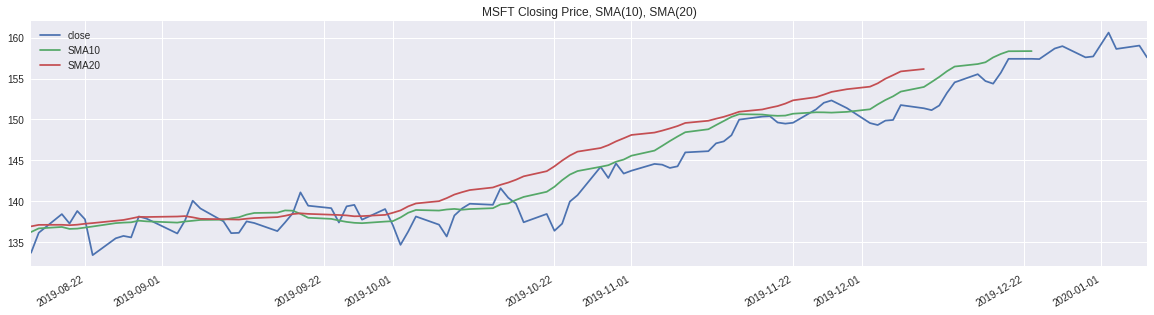

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c1d7d4cf8>, None)

In [88]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()
# stock # NaN because it takes mean of n period FORWARD, alphavantage issue on data importing

***SORT DATA BY DATE ASCENDING & PLOT RIGHT CHART***

In [89]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-01-07,159.32,159.670,157.32,157.58,21253280.0,NaN,NaN
2020-01-06,157.08,159.100,156.51,159.03,20826702.0,NaN,NaN
2020-01-03,158.32,159.945,158.06,158.62,21121681.0,NaN,NaN
2020-01-02,158.78,160.730,158.33,160.62,22634546.0,NaN,NaN
2019-12-31,156.77,157.770,156.45,157.70,18393383.0,NaN,NaN


In [90]:
stock = stock.sort_index(ascending=True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-08-15,134.390,134.5800,132.250,133.68,28125416.0,136.219,136.9115
2019-08-16,134.880,136.4600,134.720,136.13,25026151.0,136.663,137.0935
2019-08-19,137.855,138.5500,136.885,138.41,24370543.0,136.836,137.1035
2019-08-20,138.210,138.7100,137.240,137.26,21188998.0,136.599,137.0525
2019-08-21,138.550,139.4935,138.000,138.79,14982314.0,136.636,137.1155


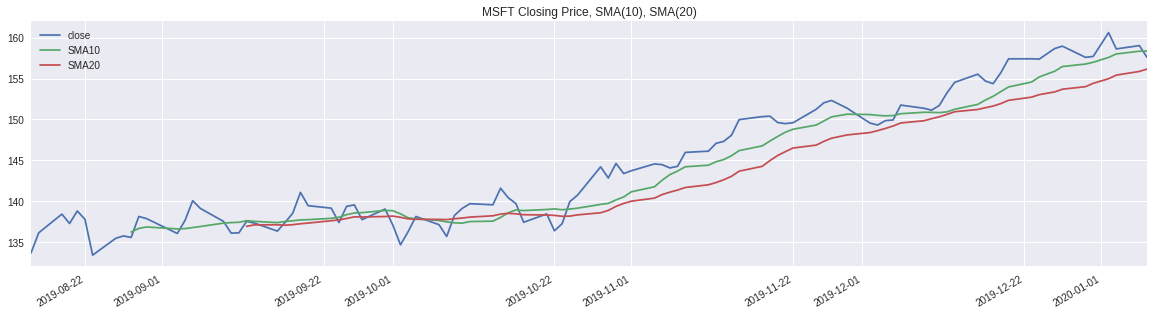

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c1d755d68>, None)

In [91]:
# Need to recalculate SMA

stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

In [92]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-08-15,134.390,134.5800,132.250,133.68,28125416.0,NaN,NaN
2019-08-16,134.880,136.4600,134.720,136.13,25026151.0,NaN,NaN
2019-08-19,137.855,138.5500,136.885,138.41,24370543.0,NaN,NaN
2019-08-20,138.210,138.7100,137.240,137.26,21188998.0,NaN,NaN
2019-08-21,138.550,139.4935,138.000,138.79,14982314.0,NaN,NaN


***REMOVE NaN***

              open    high       low   close      volume    SMA10     SMA20
2019-09-12  137.85  138.42  136.8700  137.52  27009981.0  137.604  136.9115
2019-09-13  137.78  138.06  136.5700  137.32  23363057.0  137.524  137.0935
2019-09-16  135.83  136.70  135.6600  136.33  16731440.0  137.371  137.1035
2019-09-17  136.96  137.52  136.4250  137.39  17976285.0  137.506  137.0525
2019-09-18  137.36  138.67  136.5299  138.52  24473386.0  137.595  137.1155


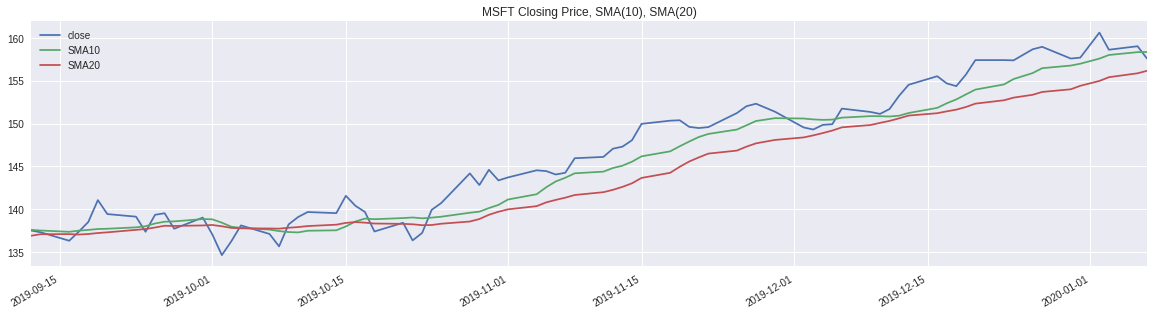

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c1d73a198>, None)

In [93]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

***EVALUATING SIGNAL : Using Information Coefficient & Spearman Correlation***

In [94]:
# get sma10 & sma20 difference value

signal = pd.DataFrame()
signal['crossover'] = stock['SMA10'] - stock['SMA20']
signal.tail()

,crossover
2019-12-31,2.5780
2020-01-02,2.6055
2020-01-03,2.5920
2020-01-06,2.4690
2020-01-07,2.1945


In [95]:
# join the crossover table to our main table

stock = stock.join(signal, how='left')
stock.tail()

,open,high,low,close,volume,SMA10,SMA20,crossover
2019-12-31,156.77,157.770,156.45,157.70,18393383.0,156.989,154.4110,2.5780
2020-01-02,158.78,160.730,158.33,160.62,22634546.0,157.582,154.9765,2.6055
2020-01-03,158.32,159.945,158.06,158.62,21121681.0,158.007,155.4150,2.5920
2020-01-06,157.08,159.100,156.51,159.03,20826702.0,158.339,155.8700,2.4690
2020-01-07,159.32,159.670,157.32,157.58,21253280.0,158.356,156.1615,2.1945


In [96]:
# calculate stock closing price difference from the previous 1 day

signal['close-close']=stock['close'].diff(periods=1)
signal.head()

,crossover,close-close
2019-09-12,0.6925,NaN
2019-09-13,0.4305,-0.20
2019-09-16,0.2675,-0.99
2019-09-17,0.4535,1.06
2019-09-18,0.4795,1.13


In [98]:
# finding momentum signal. return true if signal exist, false if not 

signal.dropna(inplace=True) # inplace=True will remove the row that has NaN value entirely. False will keep the row and change the NaN value
quality = (signal['crossover'] > 0) & (signal['close-close'] > 0) | (signal['crossover'] < 0) & (signal['close-close'] < 0) # definition of signal : buy if (price increase & sma10 > sma20) . sell if (price  decrease & sma10 < sma20)
display(quality.head())

# convert quality from boolean to integer
quality = quality.astype(int)
quality.head()


2019-09-13    False
2019-09-16    False
2019-09-17     True
2019-09-18     True
2019-09-19     True
dtype: bool

2019-09-13    0
2019-09-16    0
2019-09-17    1
2019-09-18    1
2019-09-19    1
dtype: int64

In [99]:
# calculating information coefficient : https://www.investopedia.com/terms/i/information-coefficient.asp

proportion_correct = quality.sum()/quality.count()
display(proportion_correct)

information_coefficient = 2*proportion_correct - 1
information_coefficient # +1 good, -1 bad



0.575

0.1499999999999999

In [100]:
# spearman correlation (why not pearson tho ?)

signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,0.010689
close-close,0.010689,1.000000
